In [48]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [50]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [51]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
             'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [52]:
train_images.shape

(60000, 28, 28)

In [53]:
len(train_labels)

60000

In [54]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [55]:
test_images.shape

(10000, 28, 28)

In [56]:
len(test_labels)

10000

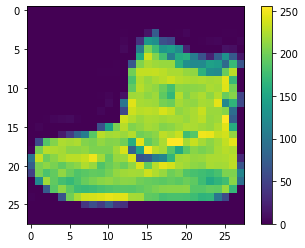

In [59]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [60]:
train_images=train_images/255.0
test_images=test_images/255.0

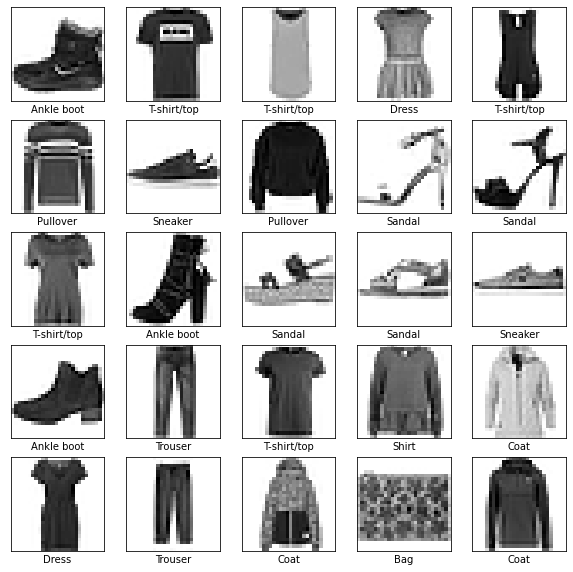

In [61]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [63]:
model=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(28, 28)),
                           tf.keras.layers.Dense(128, activation='relu'),
                           tf.keras.layers.Dense(10)
])

In [64]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [65]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4956 - accuracy: 0.8264
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3732 - accuracy: 0.8665
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3371 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3100 - accuracy: 0.8871
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2916 - accuracy: 0.8931
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2796 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2681 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2559 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2472 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [68]:
test_loss, test_acc= model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3353 - accuracy: 0.8845

Test accuracy: 0.8845000267028809


In [69]:
a_model=tf.keras.Sequential([model,
                             tf.keras.layers.Softmax()])

In [70]:
predictions=a_model.predict(test_images)

In [71]:
predictions[0]

array([7.3764991e-06, 2.5540919e-10, 1.1489722e-08, 1.2025833e-09,
       1.0448649e-08, 1.6486082e-02, 2.6870251e-07, 1.4929244e-02,
       1.4350741e-07, 9.6857685e-01], dtype=float32)

In [72]:
np.argmax(predictions[0])

9

In [73]:
test_labels[0]

9

In [80]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

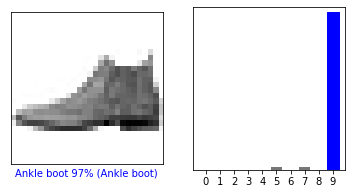

In [81]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

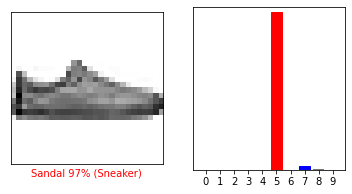

In [85]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

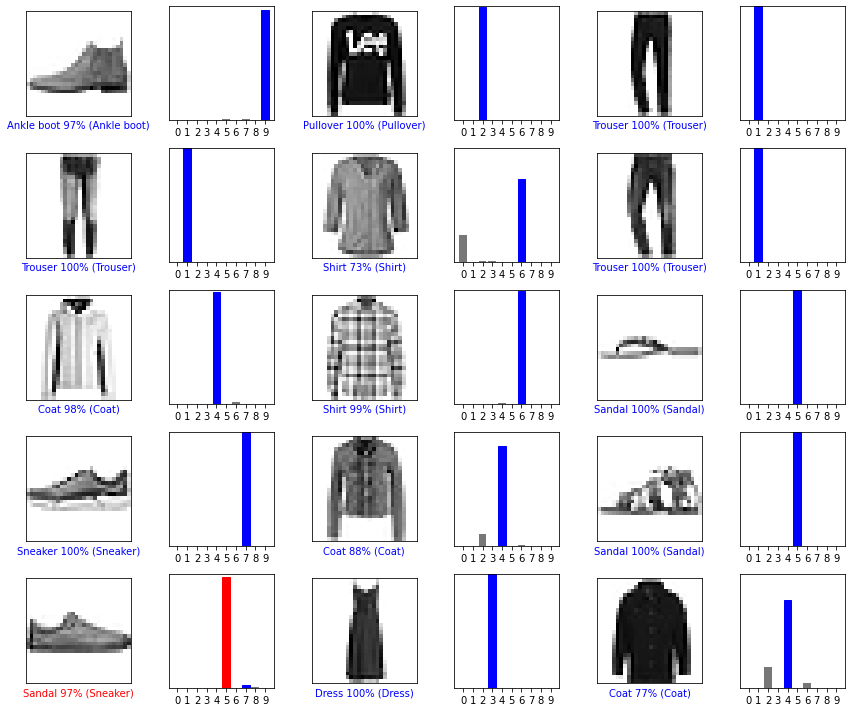

In [89]:
num_rows=5
num_cols=3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [90]:
img=test_images[1]
print(img.shape)

(28, 28)


In [91]:
img=(np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [92]:
predictions_single=a_model.predict(img)
print(predictions_single)

[[8.6099581e-06 2.2048581e-16 9.9883229e-01 7.4027789e-10 8.8329444e-04
  1.5591696e-12 2.7571540e-04 1.4442661e-17 3.1883740e-10 4.2861053e-15]]


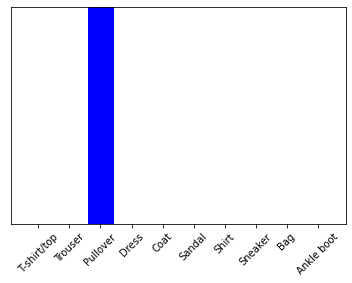

In [93]:
plot_value_array(1, predictions_single[0], test_labels)
_ =plt.xticks(range(10), class_names, rotation=45)

In [94]:
np.argmax(predictions_single[0])

2